## DSC 170. Advanced Geopandas. Week 2, lecture 1 (and more)


We will also look at several key data sources, for San Diego and California, and work with several real datasets.

In [2]:
# loading the regular packages. Note that you need %matplotlib inline to show maps

%matplotlib inline 
import geopandas # to be able to work with map data
import pandas as pd

import os
current_dir = os.getcwd()
print(current_dir)

/Users/kaushikramganapathy/Downloads


## 1. Let's explore several real datasets

There are lots of spatial data available online, from federal, state and local agencies,  from companies, university projects, and idividual enthusiasts.

A good source of data for San Diego is http://sandag.org (go to Maps and GIS). This is a good example of a local (county-wide) spatial data warehouse, with integrated online mapping.

Spatial data for California can be retrieved from CA data portal (http://data.ca.gov), CA GIS portal (http://portal.gis.ca.gov/geoportal/catalog/search/browse/browse.page), or https://mapcruzin.com/free-united-states-shapefiles/free-california-arcgis-maps-shapefiles.htm. There are many other sources as well.

You may also consult various library guides, eg http://libguides.humboldt.edu/c.php?g=303789&p=2026238,  https://ucsd.libguides.com/data-statistics/frequentlyuseddata 

For US-wide data, see http://data.gov. Many datasets are available as GeoJSON or shapefiles.


In [4]:
# From SanDAG, we'll grab a layer of parks

# From mapcruzin.com, we'll get CA Coastline and CA Water shapefiles

# Note that data layers served by government agencies typically have 
# well-constructed metadata, following a common standard. Not always the case with other data.


# first, read them into geodataframes, and explore, using INFO (for the tabular structure)
# and PLOT (to create a map):

shpFileIn = '/Users/kaushikramganapathy/DSC-170/PARKS/PARKS.shp'
sd_parks = geopandas.read_file(shpFileIn)
sd_parks.info



<bound method DataFrame.info of                          NAME    OWNERSHIP   GIS_ACRES   PARK_TYPE  \
0           South Carlsbad SB  State Parks  115.895776       State   
1             Torrey Pines SB  State Parks   67.294250       State   
2                 Ruocco Park        SDUPD    3.312523       Local   
3            Tuna Harbor Park        SDUPD    0.639034       Local   
4     San Diego Bayfront Park        SDUPD    3.669269       Local   
...                       ...          ...         ...         ...   
2753              San Vicente   County DPR   68.864886  Open Space   
2754          Dictionary Hill   County DPR  173.639484  Open Space   
2755              San Vicente   County DPR   18.852955  Open Space   
2756          Mountain Meadow   County DPR  669.069199  Open Space   
2757             Peutz Valley   County DPR  254.631750  Open Space   

                   SOURCE SOURCE_DAT SOURCE_NOT  \
0             State Parks       0416       None   
1             State Parks



Which operation would we use if we want to aggregate this dataset by park names?



In [5]:
# showing a single park by name
cols = ['geometry','NAME','OWNERSHIP']

a = sd_parks[cols]
a[a['NAME'] == 'All Seasons Park']

,geometry,NAME,OWNERSHIP
222,"POLYGON ((6338882.000 1803444.130, 6338474.500...",All Seasons Park,City of Chula Vista


                  NAME          OWNERSHIP   GIS_ACRES   PARK_TYPE  \
762   CARMEL VALLEY OS  City of San Diego    3.166911  Open Space   
809   CARMEL VALLEY OS  City of San Diego    0.795209  Open Space   
824   CARMEL VALLEY OS  City of San Diego    1.791165  Open Space   
854   CARMEL VALLEY OS  City of San Diego    0.670226  Open Space   
876   CARMEL VALLEY OS  City of San Diego    0.398738  Open Space   
...                ...                ...         ...         ...   
2586  CARMEL VALLEY OS  City of San Diego    1.315454  Open Space   
2593  CARMEL VALLEY OS  City of San Diego    0.818499  Open Space   
2594  CARMEL VALLEY OS  City of San Diego    0.746216  Open Space   
2612  CARMEL VALLEY OS  City of San Diego  211.958554  Open Space   
2613  CARMEL VALLEY OS  City of San Diego   44.910700  Open Space   

                 SOURCE SOURCE_DAT  SOURCE_NOT LOCATION  \
762   City of San Diego       0516  Open Space     None   
809   City of San Diego       0516  Open Space     No

<AxesSubplot:>

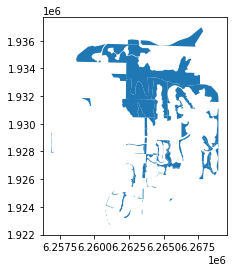

In [6]:
# experimenting with multiple names

header=['NAME','OWNERSHIP','LOCATION','ALIAS_NAME']
sd_parks.to_csv('prks.csv', columns=header)

print(sd_parks.loc[sd_parks['NAME'] == 'CARMEL VALLEY OS'])

sd_parks.loc[sd_parks['NAME'] == 'CARMEL VALLEY OS'].plot()


<AxesSubplot:>

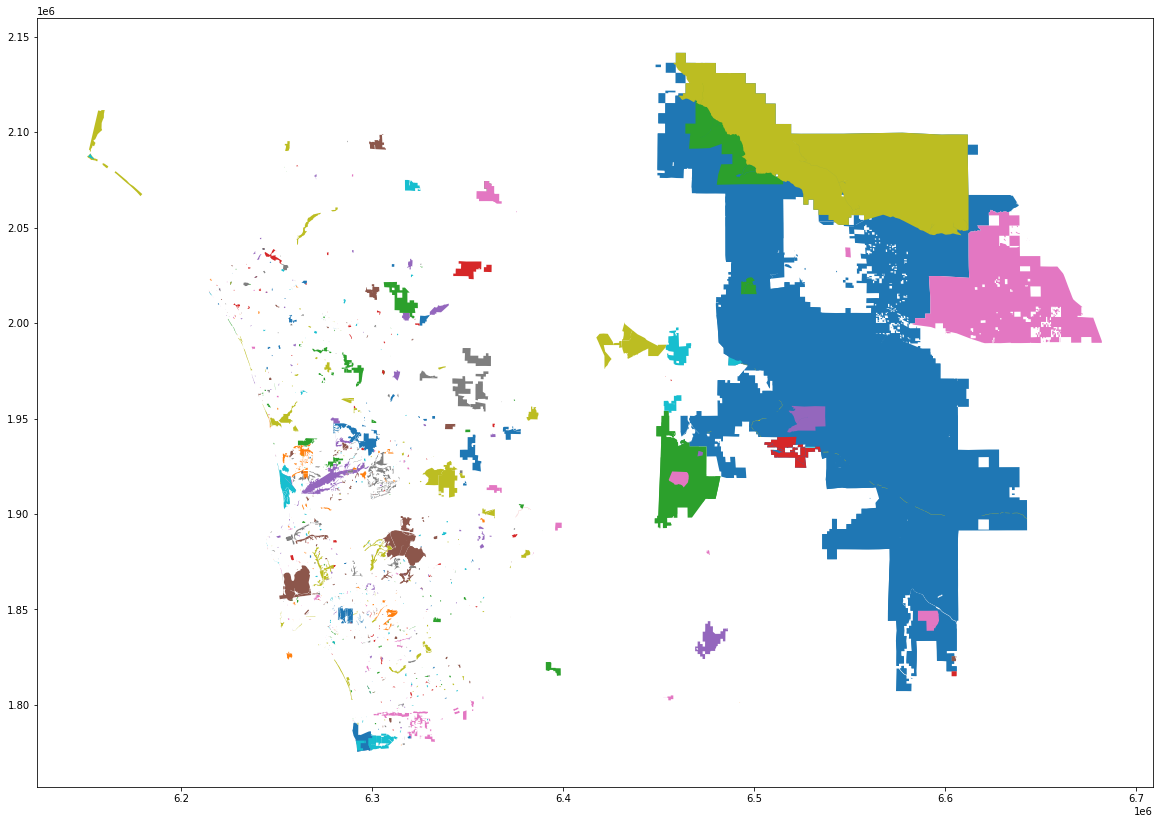

In [7]:
# experimenting with DISSOLVE

# header=['NAME','OWNERSHIP','LOCATION','ALIAS_NAME']
# sd_parks.to_csv('prks.csv', columns=header)

# sd_parks.loc[sd_parks['NAME'] == 'CARMEL VALLEY OS'].plot()

cols = ['geometry','NAME','OWNERSHIP']
sd_parks_dissolved = sd_parks[cols].dissolve(by='NAME', aggfunc = 'first', as_index=False)
sd_parks_dissolved.plot(figsize=(20,20), column = 'NAME')


In [10]:
sd_parks_dissolved.geom_type
# sd_parks.geom_type

# park boundaries are provided by municipalities and organized into a single layer by SanDAG

# might be an interesting exercise - to compute number of points per length of line segments in data from different sources

0           Polygon
1      MultiPolygon
2           Polygon
3      MultiPolygon
4           Polygon
           ...     
939    MultiPolygon
940         Polygon
941         Polygon
942         Polygon
943         Polygon
Length: 944, dtype: object

<AxesSubplot:>

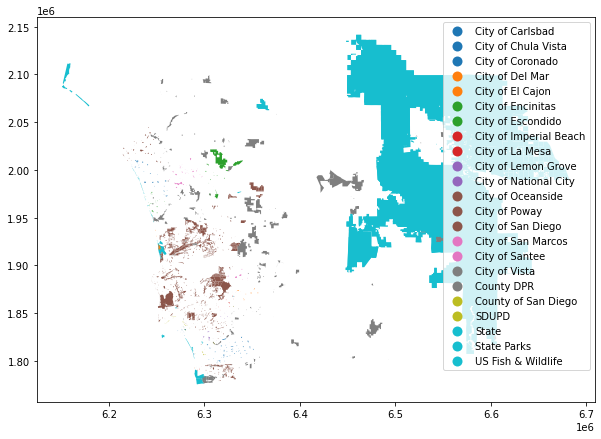

In [11]:
# Let's plot the parks data we just loaded
sd_parks.plot(figsize=(10,10), column = 'OWNERSHIP', legend = True)

In [13]:
# we also have several California datasets, preloaded in the "data" directory, 
# let's load water objects, and California coastline, from mapcruzin.com

shpFileIn = '/Users/kaushikramganapathy/Downloads/california_coastline/california_coastline.shp'

ca_water = geopandas.read_file(shpFileIn)
ca_water.info

<bound method DataFrame.info of         NATURAL  NAME                                           geometry
0     shoreline  None  LINESTRING (-124.34626 40.58457, -124.34643 40...
1     shoreline  None  LINESTRING (-124.38934 40.40479, -124.38894 40...
2     shoreline  None  LINESTRING (-124.35835 40.25615, -124.35821 40...
3     shoreline  None  LINESTRING (-124.29407 40.63538, -124.29390 40...
4     shoreline  None  LINESTRING (-124.27935 40.69336, -124.27956 40...
...         ...   ...                                                ...
1088  shoreline  None  LINESTRING (-117.11262 32.64937, -117.11267 32...
1089  shoreline  None  LINESTRING (-117.11321 32.61468, -117.11347 32...
1090  shoreline  None  LINESTRING (-117.10720 32.60446, -117.10794 32...
1091  shoreline  None  LINESTRING (-117.10539 32.62500, -117.10528 32...
1092  shoreline  None  LINESTRING (-117.10839 32.62942, -117.10812 32...

[1093 rows x 3 columns]>

NATURAL     1093
NAME          58
geometry    1093
dtype: int64

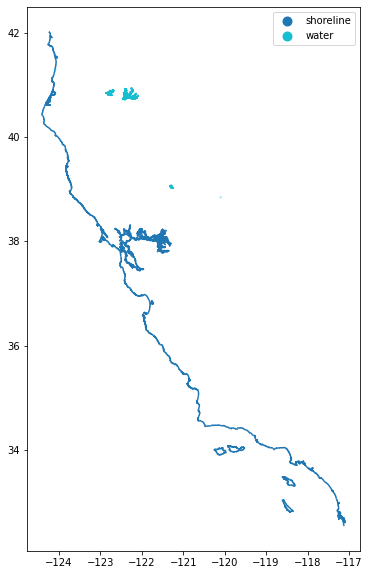

In [14]:
ca_water.plot(figsize=(10,10), column = 'NATURAL', legend = True)
ca_water.count()

# see that not all water bodies have a name

In [16]:
shpFileIn = '/Users/kaushikramganapathy/Downloads/california_coastline/california_coastline.shp'
ca_coastline = geopandas.read_file(shpFileIn)
ca_coastline.info

<bound method DataFrame.info of         NATURAL  NAME                                           geometry
0     shoreline  None  LINESTRING (-124.34626 40.58457, -124.34643 40...
1     shoreline  None  LINESTRING (-124.38934 40.40479, -124.38894 40...
2     shoreline  None  LINESTRING (-124.35835 40.25615, -124.35821 40...
3     shoreline  None  LINESTRING (-124.29407 40.63538, -124.29390 40...
4     shoreline  None  LINESTRING (-124.27935 40.69336, -124.27956 40...
...         ...   ...                                                ...
1088  shoreline  None  LINESTRING (-117.11262 32.64937, -117.11267 32...
1089  shoreline  None  LINESTRING (-117.11321 32.61468, -117.11347 32...
1090  shoreline  None  LINESTRING (-117.10720 32.60446, -117.10794 32...
1091  shoreline  None  LINESTRING (-117.10539 32.62500, -117.10528 32...
1092  shoreline  None  LINESTRING (-117.10839 32.62942, -117.10812 32...

[1093 rows x 3 columns]>

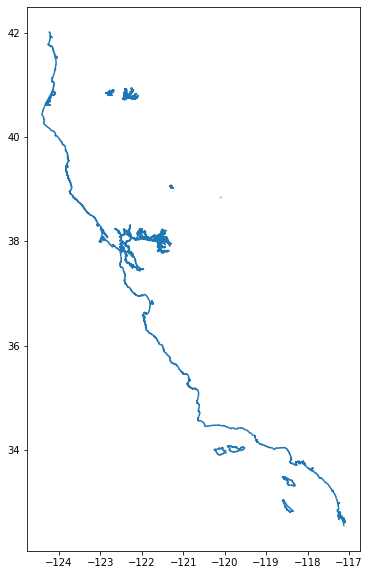

In [17]:
ca_map = ca_coastline.plot(figsize=(10,10))

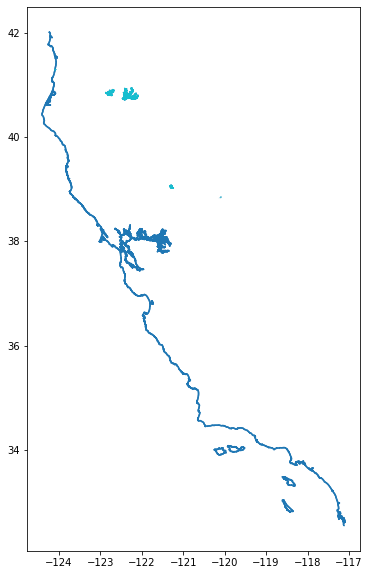

In [18]:
# now, we'll try to create a single map showing several themes: coastline, water objects, and SD parks
# recall how we combined several layers in the previous lecture: first you draw a basemap (eg coastline, 
# in our case), then add other layers to it. 


ca_map = ca_coastline.plot(figsize=(10,10))
ca_water.plot(ax=ca_map, column = 'NATURAL');

Text(0.5, 1.0, 'SD Parks')

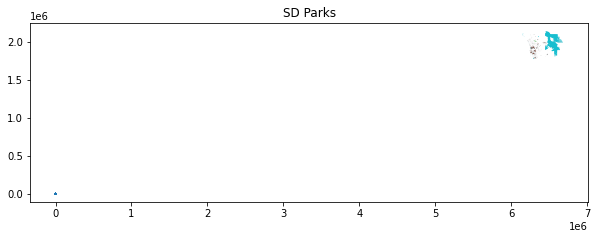

In [19]:
ca_map = ca_coastline.plot(figsize=(10,10))
sd_parks.plot(ax=ca_map, column = 'OWNERSHIP')
ca_map.set_title("SD Parks")      

# you can set a map title and several other common map elements, but graphic capabilities here are limited

__Why don't we see both the coastline and the parks??__



In [20]:
# let's check the coordinate reference system (crs) of the map layers

ca_water.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

EPSG (European Petroleum Survey Group) started cataloguing projections and giving them standard descriptions and identification numbers. It was later absorbed into IOGP (International Association of Oil & Gas Producers), which maintains the "EPSG Geodetic Parameter Set". The IDs are still known as EPSG codes. 

Remember the most widely used coordinate reference systems in our area:

* 4326: WGS84, latitude/longitude, in decimal degrees, used in GPS; covers the world; http://epsg.io/4326, http://spatialreference.org/ref/epsg/4326/. Geographic coordinate system. The default used in most cases by web mapping APIs. You normally use this coord system in KML etc. If a CRS is not specified, and the data are relatively recent, and look like latitude and longitude, there is a good chance it is 4326.

* 2230: California State Plane Zone 6, over NAD83, used for San Diego, feet http://spatialreference.org/ref/epsg/nad83-california-zone-6-ftus/, http://epsg.io/2230. State Plane Coordinate Systems are rectangular plane coord systems used within states (so expect local data in this system). Coordinates are in feet. Most states have several zones.

* 3857: Projected coordinate system used by Google Maps, OpenStreetMap, etc. Use it when need to align with map tiles coming from online map services. Based on WGS84 datum. Also called Web Mercator projection, units are meters (but not uniform). Map servers convert lat/lon to 3857 internally to match with basemap imagery. Also known as EPSG:900913 (earlier and not too official; 900913 came from 'GOOGLE'). Covers up to 85 degrees latitude. https://epsg.io/3857 , https://en.wikipedia.org/wiki/Web_Mercator_projection 

* 26911: UTM Zone 11N, over NAD83;  Topographic mapping. Larger areas; in meters. http://epsg.io/26911. UTM Grid is use din all countries, covers area between 80 degrees N and S. Divided into columns of 6 degrees (zones), numbered from 1 to 60. Each zone has a central meridian, it is assigned 500,000 m Easting (to make sure coordinates are positive numbers). Equator is assigned 0 m Northing for Northern Hemisphere; 10,000,000m Northing for Southern Hemisphere.

Other good reference sites:
* http://mapref.org/
* https://proj4.org/operations/projections/



In [21]:
# we can assign a coordinate reference system to geopandas geometry

ca_water.crs = {'epsg:4326'}

CRSError: Invalid CRS input: {'epsg:4326'}

In [22]:
ca_water.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
sd_parks.crs

# notice that now we have a different coordinate system!

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
# have to reproject so that the coordinates match

sd_parks2 = sd_parks.to_crs('epsg:4326')

# in the most recent version it is much faster than before!!



In [25]:
sd_parks2.head() # notice that polygon coordinates are now different

,NAME,OWNERSHIP,GIS_ACRES,PARK_TYPE,SOURCE,SOURCE_DAT,SOURCE_NOT,LOCATION,ALIAS_NAME,SOURCE_ID,Shape_STAr,Shape_STLe,geometry
0,South Carlsbad SB,State Parks,115.895776,State,State Parks,0416,None,None,South Carlsbad State Beach,652,5.048404e+06,46294.948338,"MULTIPOLYGON (((-117.32891 33.12345, -117.3287..."
1,Torrey Pines SB,State Parks,67.294250,State,State Parks,0416,None,None,Torrey Pines State Beach,631,2.931328e+06,47389.938931,"POLYGON ((-117.26147 32.93883, -117.26144 32.9..."
2,Ruocco Park,SDUPD,3.312523,Local,SDUPD,0416,None,"585 Harbor Ln, San Diego. California",Ruocco Park,None,1.443292e+05,1697.299067,"POLYGON ((-117.17129 32.71138, -117.17129 32.7..."
3,Tuna Harbor Park,SDUPD,0.639034,Local,SDUPD,0416,None,"700 North Harbor Dr, San Diego. California",Tuna Harbor Park,None,2.782979e+04,981.199832,"POLYGON ((-117.17272 32.71171, -117.17270 32.7..."
4,San Diego Bayfront Park,SDUPD,3.669269,Local,SDUPD,0416,None,"One Park Boulevard, San Diego. California",San Diego Bayfront Park,None,1.598233e+05,2252.806550,"MULTIPOLYGON (((-117.16044 32.70438, -117.1600..."


Text(0.5, 1.0, 'SD Parks')

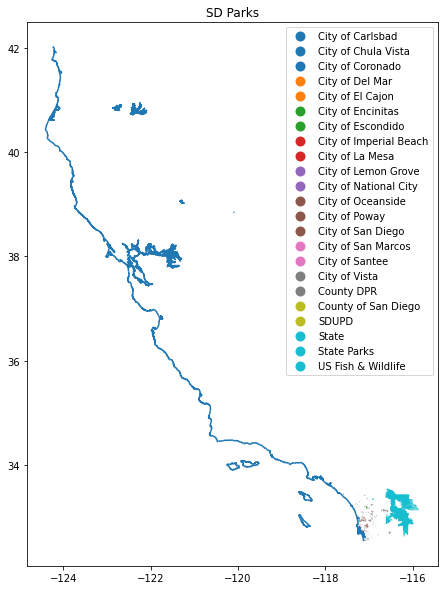

In [26]:
# let's try to construct a multu-layer map again, at least with the coastline and parks

ca_map = ca_coastline.plot(figsize=(10,10))
sd_parks2.plot(ax=ca_map, column = 'OWNERSHIP', legend = True)
ca_map.set_title("SD Parks")

In [27]:
# it would be a good idea, before attempting any geometric operations, to assert that CRS match:
assert ca_coastline.crs == sd_parks.crs, "CRS are different!"
assert ca_coastline.crs == ca_water.crs, "CRS are different!"

AssertionError: CRS are different!

## More info about projections in Geopandas: http://geopandas.org/projections.html

### Let's have a little more fun with projections, using world map


epsg:4326


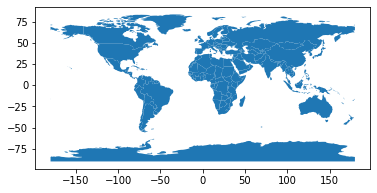

In [28]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()
print(world.crs)

<AxesSubplot:>

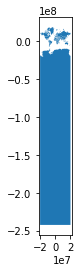

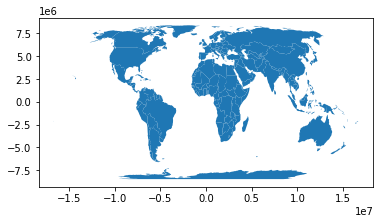

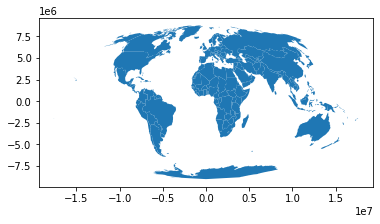

In [29]:
# Let's look at at the world map in the Web Mercator projection, and then in a couple others
world_m = world.to_crs('epsg:3395')
world_m.plot()

world_m = world.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs")
world_m.plot() #Eckert IV (copied from https://epsg.io/54012)

world_m = world.to_crs(" +proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs")
world_m.plot() #Mollweide (copied from https://epsg.io/54009)


## Tissot's Indicatrix
... is a way to charactrize local distrotions due to map projection: a geometry that results from projecting a small circle from a globe onto a map. It results in an ellipse; its shape indicates local distortions. Tissot was a 19th century French mathematician.

In [32]:
# here is a brief code fragment for drawing Tissot's indicatrix ellipses for several projections

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 5))

#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Gnomonic())

# make the map global rather than have it zoom in to
# the extents of any plotted data


# Gnomonic is the oldest map projection, developed by Thales in the 6th century BC.  
# Meridians and the equator are great circles, so shown as straight lines. Angles are preserved.

# Plate Carree (equirectangular; equidistant cylindrical projection) - probably second oldest, 
# from Marinus of Tyre, who, according to Ptolemy, invented it about 1st century AD.

# Mollweide (equal-area; pseudocylindrical projection, or elliptical projection)
# Doesn't preserve angles and shapes - but preserves areas, so used in world maps 
# where comparison od areas is important.

ax.set_global()
ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='red', alpha=0.4)

plt.show()


ModuleNotFoundError: No module named 'cartopy'

### Even more fun with projections? 
See https://xkcd.com/977/ (the best map projection for YOU!)

## 2. Spatial Operations

Now that we have coordinate information in the data frame, we can do spatial operations over it. Let's experiment with several simple operations first:

In [33]:
print(sd_parks2.geom_type[0])
print(sd_parks2.total_bounds)
print(sd_parks.total_bounds)
print(sd_parks2.centroid[0])
print(sd_parks2.representative_point()[0]) # eg when you need to place a label or point inside a polygon, guaranteed to be inside
print(sd_parks2.area[0]) # compare with:
print(sd_parks.area[0])


MultiPolygon
[-117.59618406   32.53467845 -115.8567526    33.54342826]
[6150762.64126498 1775451.8106298  6682061.56390123 2141524.66706529]
POINT (-117.3220256162607 33.10846800281045)


/var/folders/3c/s37h4q712hl9dyyqp9lxps8c0000gn/T/ipykernel_46401/1727502517.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(sd_parks2.centroid[0])


POINT (-117.3291402518812 33.12690553104959)
4.5310647073727206e-05
5048404.271402389


/var/folders/3c/s37h4q712hl9dyyqp9lxps8c0000gn/T/ipykernel_46401/1727502517.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(sd_parks2.area[0]) # compare with:


### Computing distance between spatial objects, and exploring spatial relationships

There are two options when computing distance (or other relationships): 

1. your objects are in two different geodataframes (or geoseries): sd_parks2.distance(ca_water) will return distances beetween each park and objects in ca_water 

1. your objects are in the same dataframe, and you need to compute distances between pairs of objects: use shift()... if it makes sense. 

In [34]:
# example of the first option:

# let's figure out the ID of Lake Hodges, then compute distances from first 5 parks to this lake
print(ca_water[ca_water['NAME'] == 'Lake Hodges'])

for i in range(3):
    
#     the format is: gdf1.distance(object_in_gdf2)
    
    print(sd_parks2.distance(ca_water.loc[7108,'geometry'])[i], sd_parks2.loc[i,'NAME'])
    
    
#      Question: What are the units of distance here??

Empty GeoDataFrame
Columns: [NATURAL, NAME, geometry]
Index: []


KeyError: 7108

In [35]:
# example of the second option

# let's create a subset of a gdf, with 10 parks:

sd_parks_dis = sd_parks2[0:10]
sd_parks_dis

,NAME,OWNERSHIP,GIS_ACRES,PARK_TYPE,SOURCE,SOURCE_DAT,SOURCE_NOT,LOCATION,ALIAS_NAME,SOURCE_ID,Shape_STAr,Shape_STLe,geometry
0,South Carlsbad SB,State Parks,115.895776,State,State Parks,0416,None,None,South Carlsbad State Beach,652,5.048404e+06,46294.948338,"MULTIPOLYGON (((-117.32891 33.12345, -117.3287..."
1,Torrey Pines SB,State Parks,67.294250,State,State Parks,0416,None,None,Torrey Pines State Beach,631,2.931328e+06,47389.938931,"POLYGON ((-117.26147 32.93883, -117.26144 32.9..."
2,Ruocco Park,SDUPD,3.312523,Local,SDUPD,0416,None,"585 Harbor Ln, San Diego. California",Ruocco Park,None,1.443292e+05,1697.299067,"POLYGON ((-117.17129 32.71138, -117.17129 32.7..."
3,Tuna Harbor Park,SDUPD,0.639034,Local,SDUPD,0416,None,"700 North Harbor Dr, San Diego. California",Tuna Harbor Park,None,2.782979e+04,981.199832,"POLYGON ((-117.17272 32.71171, -117.17270 32.7..."
4,San Diego Bayfront Park,SDUPD,3.669269,Local,SDUPD,0416,None,"One Park Boulevard, San Diego. California",San Diego Bayfront Park,None,1.598233e+05,2252.806550,"MULTIPOLYGON (((-117.16044 32.70438, -117.1600..."
5,Pepper Park,SDUPD,4.820511,Local,SDUPD,0416,None,"3299 Tidelands Av, National City. California",Pepper Park,None,2.099771e+05,2249.917867,"POLYGON ((-117.11039 32.65078, -117.11010 32.6..."
6,Ocotillo Wells SVRA,State Parks,21283.675293,State,State Parks,0416,None,None,Ocotillo Wells SVRA,439,9.271140e+08,786654.426653,"MULTIPOLYGON (((-116.06378 33.13307, -116.0637..."
7,We-Nelsch CP,State Parks,433.135937,State,State Parks,0416,None,None,We-Nelsch Cultural Preserve,626,1.886734e+07,20369.621509,"POLYGON ((-116.47999 33.10050, -116.47998 33.1..."
8,Agua Caliente County Park (ABDSP),State Parks,681.321305,State,State Parks,0416,None,None,Agua Caliente County Park,622,2.967826e+07,31523.788380,"MULTIPOLYGON (((-116.29498 32.96230, -116.2950..."
9,Santa Rosa Mountains SW,State Parks,136643.958677,State,State Parks,0416,None,None,Santa Rosa Mountains State Wilderness,627,5.952192e+09,753253.030634,"MULTIPOLYGON (((-116.41481 33.36547, -116.4148..."


In [36]:
# then compute distance between parks 0 and 1, 1 and 2, ...

dis = sd_parks_dis.distance(sd_parks_dis.shift())
dis

/var/folders/3c/s37h4q712hl9dyyqp9lxps8c0000gn/T/ipykernel_46401/3528862003.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dis = sd_parks_dis.distance(sd_parks_dis.shift())


0         NaN
1    0.134676
2    0.191817
3    0.000000
4    0.014054
5    0.071003
6    1.136393
7    0.391667
8    0.209655
9    0.333841
dtype: float64

In [37]:
# Adjacency is another common property that can be analyzed with Geopandas.
# Let's check if there are adhacent parks in the sequence of the first 10 parks:
adjacent = sd_parks_dis.touches(sd_parks_dis.shift())
adjacent



0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

 ### The general format of binary predicates:
 
GeoSeries.topological_condition(other)   --> returns True or False
 
These predicates check for several types of topological relationships. They are constructed from relationships between boundaries and interiors of objects. 

These topological operations can be:
 
* touches (interiors don't intersect, but have at least one point in common)
* within (or completely within: object boundaries don't touch, and both boundary and interior of one object is within another). 
* contains (object's interior contains boundary and interior of the other object; it is inverse of the "within": a.within(b) == b.contains(a)). This is how you do a common point-in-polygon (PIP) test: either p1.within(poly) or poly.contains(p1). The algorithm is Ray Casting (https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm) - but it is already implemented in Geopandas (and many other libraries) 
* intersects 
* geom_equals
* geom_almost_equals (Geoseries.geom_almost_equals(other, decimal=N). Here, N is the number of decimal places that specifies tolerance when evaluating approximate equality. Obviously, depends on the units of the projection.
* disjoint (boundaries or interiors don't intersect)
* crosses (object's interior intersects the interior of the other object, but does not contain it, and dimension of the intersection is less than the dimension of the one or the other; typically in "road crosses a park" scenario)

__In the previous example we saw two different parks that are not adjacent, but have a distance of 0 betweem them. How could that happen?__


0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

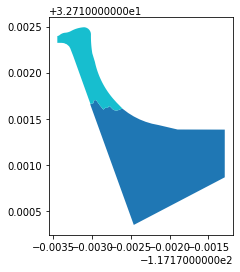

In [38]:
# let's see what is going on!
sd_parks_dis[2:4].plot(column='NAME')

intersect = sd_parks_dis.intersects(sd_parks_dis.shift())
intersect

### A summary of spatial operations:

For a complete list see at http://geopandas.org/reference.html. Shapely manual has more extensive explanations: https://shapely.readthedocs.io/en/latest/manual.html.

The key operations are:

_Binary predicates_ (see above) 

_Set-theoretical methods_: return GeoSeries
* difference: returns part of the first object's geometry that is not in other
* intersection: returns part of object's geometry that is also in other
* union: returns a union of object geometries
* symmetric_difference: returns parts of both geometries that are not in other

_Constructive methods_: return GeoSeries. Work on a single object or series.
* buffer: returns geometry within a given distance from an object
* boundary: returns geometry of lower-dimensional object
* centroid
* representative_point: similar to centroid, but ensures that it is within the higher-dimensional geometry
* envelope: bounding rectangle of a geometry, with sides parallel to coordinate axes
* convex_hull: smallest convex polygon containing all points of a geometry

### Let's explore some of them

In [39]:
# what you can do with centroids
# The current geometry column is park polygons
sd_parks2.geometry.name # this is the default geometry column name


'geometry'

/var/folders/3c/s37h4q712hl9dyyqp9lxps8c0000gn/T/ipykernel_46401/3413076624.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sd_parks2['centroids'] = sd_parks2.centroid


,NAME,OWNERSHIP,GIS_ACRES,PARK_TYPE,SOURCE,SOURCE_DAT,SOURCE_NOT,LOCATION,ALIAS_NAME,SOURCE_ID,Shape_STAr,Shape_STLe,geometry,centroids
0,South Carlsbad SB,State Parks,115.895776,State,State Parks,0416,None,None,South Carlsbad State Beach,652,5.048404e+06,46294.948338,"MULTIPOLYGON (((-117.32891 33.12345, -117.3287...",POINT (-117.32203 33.10847)
1,Torrey Pines SB,State Parks,67.294250,State,State Parks,0416,None,None,Torrey Pines State Beach,631,2.931328e+06,47389.938931,"POLYGON ((-117.26147 32.93883, -117.26144 32.9...",POINT (-117.25851 32.92029)
2,Ruocco Park,SDUPD,3.312523,Local,SDUPD,0416,None,"585 Harbor Ln, San Diego. California",Ruocco Park,None,1.443292e+05,1697.299067,"POLYGON ((-117.17129 32.71138, -117.17129 32.7...",POINT (-117.17214 32.71105)
3,Tuna Harbor Park,SDUPD,0.639034,Local,SDUPD,0416,None,"700 North Harbor Dr, San Diego. California",Tuna Harbor Park,None,2.782979e+04,981.199832,"POLYGON ((-117.17272 32.71171, -117.17270 32.7...",POINT (-117.17306 32.71206)
4,San Diego Bayfront Park,SDUPD,3.669269,Local,SDUPD,0416,None,"One Park Boulevard, San Diego. California",San Diego Bayfront Park,None,1.598233e+05,2252.806550,"MULTIPOLYGON (((-117.16044 32.70438, -117.1600...",POINT (-117.15950 32.70390)


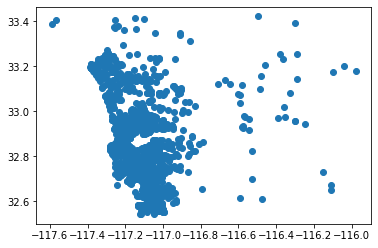

In [40]:
# create centroids and switch geometry to this new column
sd_parks2['centroids'] = sd_parks2.centroid
sd_parks2 = sd_parks2.set_geometry('centroids')
sd_parks2.plot()
sd_parks2.head()

# see, the same parks are now shown as centroids.
# Sometimes, it makes sense to show polygon objects as points - 
# especially if their geometry isn't critical, and one needs to see 
# all of them when zoomed out

<AxesSubplot:>

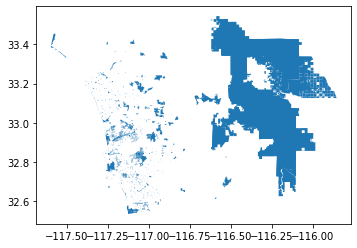

In [41]:
# if we switch geometry back to polygons, and plot - we'll see the old polygon map
sd_parks2 = sd_parks2.set_geometry('geometry')
sd_parks2.plot()

/var/folders/3c/s37h4q712hl9dyyqp9lxps8c0000gn/T/ipykernel_46401/4152551048.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sd_parks_buffer = sd_parks2.buffer(.03)


<AxesSubplot:>

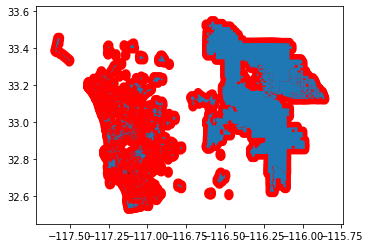

In [42]:
# Buffer is a very common operation on spatial objects: it creates a set 
# of polygons showing area at a specified distance from the original objects

sd_parks_buffer = sd_parks2.buffer(.03)
map1 = sd_parks_buffer.plot(color='red')
sd_parks2.plot(ax=map1)

## 3. Constructing a Geopandas geodataframe

In most cases, you will be reading spatial data files from other sources. But sometimes you need to create a data frame with points of interest from scratch - for example when you need to do some distance-based operations relative to these points. There are several ways to do this.

### One option is to use shapely Point constructor to create a GeoSeries, and then a GeoDataFrame from it


In [43]:
from shapely.geometry import Point
geoseries = geopandas.GeoSeries([Point(-117.2418439, 32.8844393)]) # this is SDSC building, in WKT 

# can do this for multiple objects: ...GeoSeries([Point(x1,y1), Point(x2,y2), Point(x3,y3)])

geoseries

# note that x (longitude) goes first

0    POINT (-117.24184 32.88444)
dtype: geometry

<AxesSubplot:>

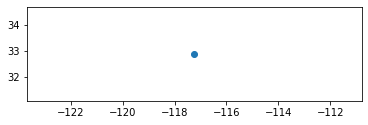

In [44]:
# Then, we can create a GeoDataFrame from the GeoSeries:

gdf_point = geopandas.GeoDataFrame(geoseries)
gdf_point.geometry = geoseries
gdf_point['name'] ='SDSC Building'
gdf_point.plot()

### Another option is to create a pandas dataframe, and then a GeoDataFrame from it

In [45]:
# Another common task is to add a point or collection of points to a map (eg proposed locations)
# and run some analysis models for them
# For this you would need to create a GeoDataFrame from a Pandas dataframe with coordinates

from shapely.geometry import Point
df = pd.DataFrame(
    {'Proposed Coffee Shop': ['Location 1', 'Location 2', 'Location 3', 'Location 4'],
     'Latitude': [32.852, 32.920, 33.006, 32.781],
     'Longitude': [-117.219,-117.256, -117.276, -117.229]})
df.head()

,Proposed Coffee Shop,Latitude,Longitude
0,Location 1,32.852,-117.219
1,Location 2,32.920,-117.256
2,Location 3,33.006,-117.276
3,Location 4,32.781,-117.229


In [46]:
# Now, we need to convert this to coordinates, and assign it to Point
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
df.head()

,Proposed Coffee Shop,Latitude,Longitude,Coordinates
0,Location 1,32.852,-117.219,POINT (-117.219 32.852)
1,Location 2,32.920,-117.256,POINT (-117.256 32.92)
2,Location 3,33.006,-117.276,POINT (-117.276 33.006)
3,Location 4,32.781,-117.229,POINT (-117.229 32.781)


<AxesSubplot:>

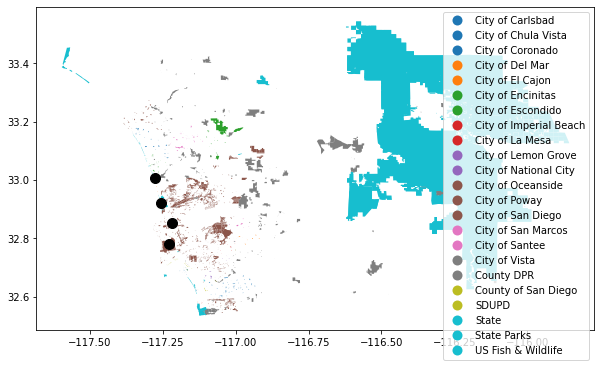

In [47]:
# next, create a GeoDataFrame from the DataFrame, simply assigning the Coordinates to be
# the geometry column
new_locations = geopandas.GeoDataFrame(df, geometry='Coordinates')
new_map = sd_parks2.plot(figsize=(10,10), column = 'OWNERSHIP', legend = True)
new_locations.plot(ax=new_map, legend = True,marker='o', color='black', markersize=100)

### Yet another option (for simple spatial objects) is to use geojson.io:

Create objects manually, then copy geojson fragment into your notebook (eg into a variable 'geojson'), and read it into geopandas:  

```python
gdf = geopandas.read_file(geojson)
```


There is a large collection of GeoJSON files at https://catalog.data.gov/dataset?res_format=GeoJSON
They are of unknown size; typically exported from other formats on the fly.

Pre-built geojson files: https://eric.clst.org/tech/usgeojson/


In [48]:
geojson='''
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -117.23756432533266,
          32.881145927337116
        ]
      }
    }
  ]
}
'''
gdf = geopandas.read_file(geojson)



There are a few more options for quickly bringing spatial data into geodataframes, for sure.

## 4. Spatial join - the core capability of GIS 
(as opposed to computer mapping systems which are primarily concerned with making maps. Whereas GIS, in a narrow sense, is about integrating data based on location)

It is like the regular attribute join - but relies on geometry fields. In terms of Geopandas, it gets  attributes from one geodataframe and adds them to another geodataframe   based on the spatial relationship between objects in the geometry columns of both. Since geometries can be represented using different types of objects (point, lines, polygons, their multipart versions - but also curves, etc.), in different coordinate systems, it becomes complicated. The meaning of spatial join also depends on the types of features being joined. 

Results of the join also depend on geometric acuracy and precision. Even if you try to join based on equal polygons (similar to simple equality in non-spatial join) the concept of "equal geometries" is not that simple (eg polygons may carve the same region of space, but have different shape points, or even rings may have different starting points...)

Geopandas, for example, defines equal polygons if their boundary, exterior and interior coinside. But boundary points may be different - see below.


In [49]:
from shapely.geometry import Polygon
poly1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)])])
poly2 = geopandas.GeoSeries([Polygon([(2,0), (2,1), (2,2), (0,2), (0,0)])])
poly1.geom_equals(poly2)

0    True
dtype: bool

In [50]:
sd_parks2.count()

NAME          2747
OWNERSHIP     2758
GIS_ACRES     2758
PARK_TYPE     2758
SOURCE        2758
SOURCE_DAT    2758
SOURCE_NOT    2345
LOCATION       586
ALIAS_NAME    2747
SOURCE_ID      370
Shape_STAr    2758
Shape_STLe    2758
geometry      2758
centroids     2758
dtype: int64

In [51]:
# You need to have valid geometries to do spatial join.
# https://stackoverflow.com/questions/56961270/geopandas-spatial-join-attributeerror-nonetype-object-has-no-attribute-bou

sd_parks2_clean = sd_parks2.loc[sd_parks2.is_valid]
new_locations_clean = new_locations.loc[new_locations.is_valid]

In [52]:
# suppose you are trying to find parks closest to the proposed locations. 
# let's use spatial join to do this. We can join based on proximity, 
# or topological predicates such as "within". 
# Other predicates can be "intersects", "contains".
# This set of predicates is rather limiting...


locations_with_parks = geopandas.sjoin(new_locations_clean, sd_parks2_clean, how='inner', op='within')

# actually, how do you find parks closest to a point??

/Users/kaushikramganapathy/opt/anaconda3/envs/dsc170textbook/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/3c/s37h4q712hl9dyyqp9lxps8c0000gn/T/ipykernel_46401/1067370986.py:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  locations_with_parks = geopandas.sjoin(new_locations_clean, sd_parks2_clean, how='inner', op='within')


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [53]:
print(new_locations_clean.crs)

None


In [54]:
new_locations_clean.crs = 'epsg:4326'

In [55]:
# let's look at the data in the geodataframe. 
# Notice several new fields, which came from sd_parks2

locations_with_parks

NameError: name 'locations_with_parks' is not defined

<AxesSubplot:>

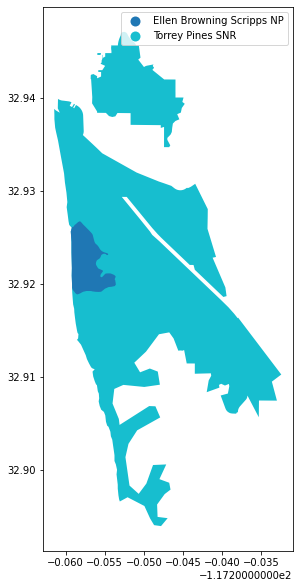

In [56]:
# why are there two parks joined to one of the locations?? Let's explore those. 

sdp = sd_parks2[sd_parks2['NAME'].isin({'Torrey Pines SNR','Ellen Browning Scripps NP'})]
sdp.plot(column='NAME',legend=True,figsize=(10,10))

Apparently, as we saw earlier with two other parks, park geometries are not necessarily tied to each other. We'll explore this in the next topic.